In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mp
import pandas as pd
import matplotlib.patches as mpatches
import numpy as np

In [13]:
AdvancedBattingDf = pd.read_csv('AdvancedBattingClean.csv', float_precision='round_trip')

In [14]:
AdvancedBattingDf

,index,rOBA,Rbat+,BAbip,ISO,HR%,SO%,BB%,LD%,GB%,...,Oppo%,WPA,cWPA,RE24,RS%,SB%,XBT%,Year,Tm,Playoff
0,0,0.330,91,0.290,0.144,0.025,0.161,0.079,0.255,0.377,...,0.201,-10.0,-0.040,-93.3,0.28,0.69,0.44,2001,Anaheim Angels,No
1,1,0.343,91,0.294,0.175,0.033,0.166,0.093,0.246,0.389,...,0.197,-2.9,-0.013,28.4,0.31,0.65,0.42,2001,Arizona Diamondbacks,Yes
2,2,0.328,85,0.290,0.152,0.028,0.169,0.080,0.226,0.442,...,0.212,-5.9,-0.063,-38.8,0.30,0.65,0.45,2001,Atlanta Braves,Yes
3,3,0.317,88,0.278,0.131,0.022,0.161,0.084,0.246,0.392,...,0.199,-10.0,-0.020,-85.3,0.30,0.72,0.47,2001,Baltimore Orioles,No
4,4,0.341,100,0.300,0.173,0.032,0.181,0.083,0.252,0.402,...,0.200,-2.3,-0.015,-19.2,0.30,0.57,0.34,2001,Boston Red Sox,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,25,0.322,101,0.287,0.168,0.033,0.224,0.080,0.228,0.405,...,0.167,1.2,-0.013,3.6,0.30,0.80,0.43,2021,St. Louis Cardinals,Yes
596,26,0.328,112,0.294,0.186,0.036,0.248,0.094,0.229,0.424,...,0.177,8.0,0.061,120.0,0.35,0.68,0.47,2021,Tampa Bay Rays,Yes
597,27,0.297,82,0.280,0.143,0.028,0.232,0.073,0.225,0.463,...,0.185,-16.7,-0.029,-136.9,0.29,0.79,0.41,2021,Texas Rangers,No
598,28,0.345,113,0.296,0.200,0.043,0.201,0.082,0.245,0.405,...,0.176,3.7,0.029,103.8,0.33,0.80,0.41,2021,Toronto Blue Jays,No


In [15]:
tempDf = AdvancedBattingDf.replace('No',0)
tempDf = tempDf.replace('Yes',1)
tempDf.corr()

,index,rOBA,Rbat+,BAbip,ISO,HR%,SO%,BB%,LD%,GB%,...,Cent%,Oppo%,WPA,cWPA,RE24,RS%,SB%,XBT%,Year,Playoff
index,1.000000e+00,-0.080251,0.070246,-0.147288,-0.068208,-0.043447,-0.010219,0.049047,0.012481,0.035638,...,0.066363,-0.027429,0.035245,0.012312,0.002961,-0.032747,0.072795,-0.010381,4.422467e-15,-0.024450
rOBA,-8.025066e-02,1.000000,0.724257,0.458694,0.644295,0.475478,-0.446855,0.514193,-0.163228,-0.346714,...,-0.102446,-0.001791,0.742218,0.600112,0.798862,0.684167,0.086365,0.031233,-3.982286e-01,0.400578
Rbat+,7.024629e-02,0.724257,1.000000,0.358557,0.557399,0.477596,-0.176150,0.427378,0.047620,-0.243805,...,-0.141967,-0.104289,0.802718,0.665246,0.853570,0.509897,0.095733,-0.046886,-2.505200e-03,0.454190
BAbip,-1.472876e-01,0.458694,0.358557,1.000000,0.067949,-0.080072,-0.014111,0.007772,0.084017,0.174181,...,0.135485,0.182200,0.366922,0.325058,0.425485,0.398378,0.007055,0.050586,1.098789e-02,0.157836
ISO,-6.820785e-02,0.644295,0.557399,0.067949,1.000000,0.949805,0.183296,0.421836,0.154268,-0.481159,...,-0.346273,-0.041891,0.542148,0.431101,0.600090,0.506906,0.075700,0.031667,1.075207e-01,0.311349
HR%,-4.344739e-02,0.475478,0.477596,-0.080072,0.949805,1.000000,0.305893,0.338678,0.204950,-0.419631,...,-0.362881,-0.061336,0.441585,0.352773,0.483765,0.355126,0.077130,-0.000017,2.310972e-01,0.267723
SO%,-1.021864e-02,-0.446855,-0.176150,-0.014111,0.183296,0.305893,1.000000,-0.001638,0.457334,0.052399,...,-0.075847,-0.038428,-0.188788,-0.142863,-0.160802,-0.289313,0.076612,0.000494,7.487444e-01,-0.070473
BB%,4.904689e-02,0.514193,0.427378,0.007772,0.421836,0.338678,-0.001638,1.000000,-0.019124,-0.361674,...,-0.066214,-0.111349,0.452031,0.364308,0.495104,0.219811,0.132676,-0.031619,-8.389330e-02,0.344885
LD%,1.248092e-02,-0.163228,0.047620,0.084017,0.154268,0.204950,0.457334,-0.019124,1.000000,-0.195660,...,-0.351087,0.321837,0.022663,0.019457,0.065751,-0.040056,-0.039828,0.033300,4.259248e-01,0.042366
GB%,3.563758e-02,-0.346714,-0.243805,0.174181,-0.481159,-0.419631,0.052399,-0.361674,-0.195660,1.000000,...,0.284940,0.048699,-0.207381,-0.159761,-0.244480,-0.245843,-0.008709,-0.007307,2.570185e-01,-0.100687


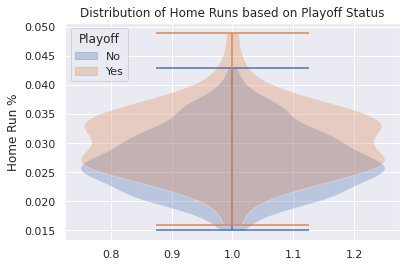

In [16]:
labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

add_label(plt.violinplot(AdvancedBattingDf.loc[AdvancedBattingDf['Playoff'] == 'No', 'HR%']),'No')
add_label(plt.violinplot(AdvancedBattingDf.loc[AdvancedBattingDf['Playoff'] == 'Yes', 'HR%']),'Yes')
plt.ylabel('Home Run %')
plt.title('Distribution of Home Runs based on Playoff Status')
plt.legend(*zip(*labels), loc=2, title='Playoff')
plt.show()

Text(0.5, 1.0, 'Winning Probability vs Home Run %')

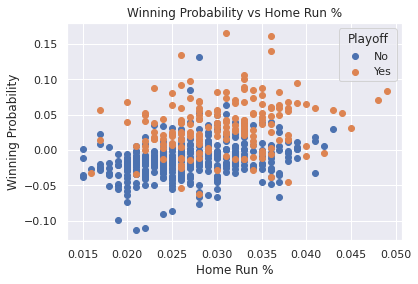

In [17]:
plt.scatter(AdvancedBattingDf.loc[AdvancedBattingDf['Playoff'] == 'No', 'HR%'],AdvancedBattingDf.loc[AdvancedBattingDf['Playoff'] == 'No', 'cWPA'], label='No')
plt.scatter(AdvancedBattingDf.loc[AdvancedBattingDf['Playoff'] == 'Yes', 'HR%'],AdvancedBattingDf.loc[AdvancedBattingDf['Playoff'] == 'Yes', 'cWPA'], label='Yes')
plt.legend(title='Playoff')
plt.ylabel('Winning Probability')
plt.xlabel('Home Run %')
plt.title('Winning Probability vs Home Run %')

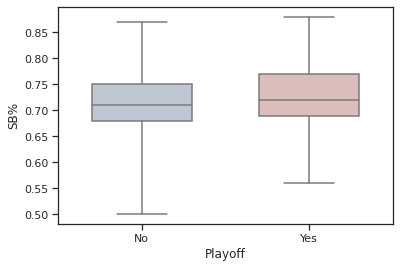

In [18]:
sns.set_theme(style="ticks")
sns.boxplot(x="Playoff", y="SB%", data=AdvancedBattingDf,
            whis=[0, 100], width=.6, palette="vlag")

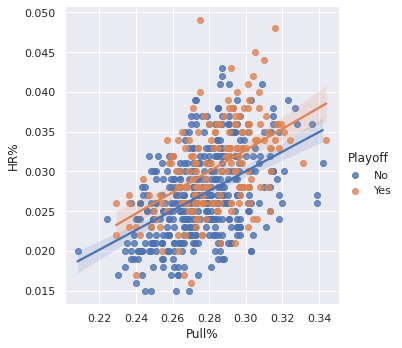

In [19]:
sns.set_theme()
sns.lmplot(data=AdvancedBattingDf, x="Pull%", y="HR%", hue="Playoff", height=5)

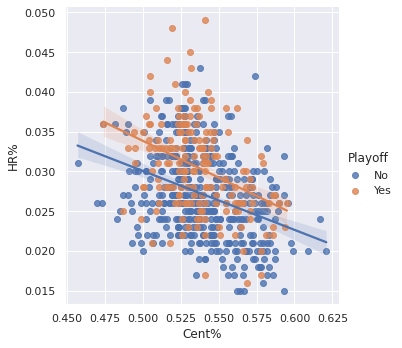

In [20]:
sns.set_theme()
sns.lmplot(data=AdvancedBattingDf, x="Cent%", y="HR%", hue="Playoff", height=5)

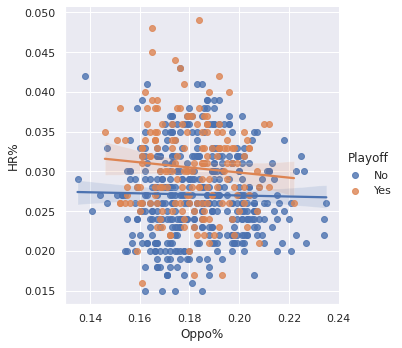

In [21]:
sns.set_theme()
sns.lmplot(data=AdvancedBattingDf, x="Oppo%", y="HR%", hue="Playoff", height=5)

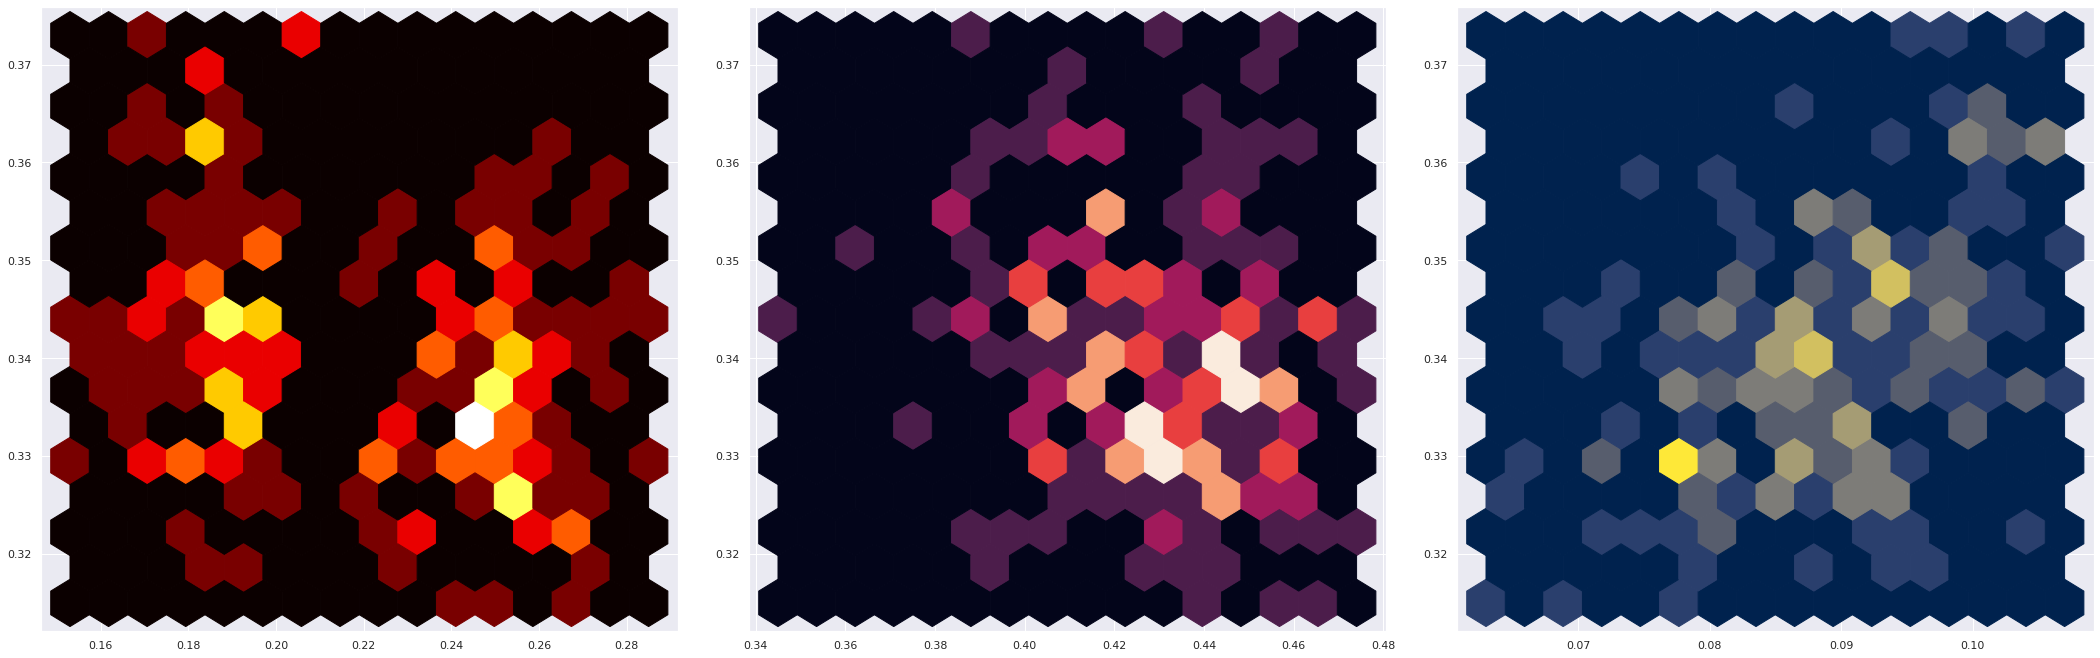

In [22]:
X1=AdvancedBattingDf.loc[AdvancedBattingDf['Playoff']=='Yes', ['LD%','rOBA']].sort_values('LD%')
X2=AdvancedBattingDf.loc[AdvancedBattingDf['Playoff']=='Yes', ['GB%','rOBA']].sort_values('GB%')
X3=AdvancedBattingDf.loc[AdvancedBattingDf['Playoff']=='Yes', ['BB%','rOBA']].sort_values('BB%')

fig, ax=plt.subplots(nrows = 1, ncols = 3, figsize=(30,10))
fig.tight_layout(pad=3.0)
ax[0].hexbin(X1['LD%'],X1['rOBA'], gridsize=15, cmap='hot')
ax[1].hexbin(X2['GB%'], X2['rOBA'], gridsize=15)
ax[2].hexbin(X3['BB%'], X3['rOBA'], gridsize=15, cmap='cividis')